##  K-nearest neighbours.

當您要求 k-NN 對數據點進行預測時 X，算法查看傳入的所有訓練數據並找到 k，最近（例如最近的 5 個點）

<AxesSubplot:xlabel='x1', ylabel='x2'>

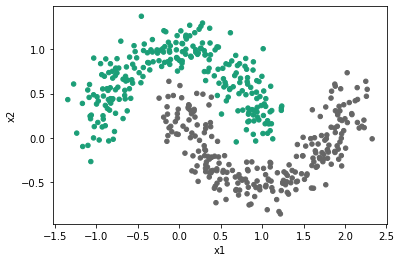

In [1]:
# make_moons 函數，為我們提供以新月形狀排列的標記數據

import pandas as pd
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.15, random_state=42)
X = pd.DataFrame(X, columns=["x1", "x2"])

X.plot.scatter("x1", "x2", c=y, colormap="Dark2", colorbar=False)

- K-NN 是一種 non-generalising learning algorithm （非泛化學習算法）。它並沒有簡化我們傳入的訓練數據，它實際上將所有這些數據存儲在內部。當我們要求它進行預測時，它實際上需要去尋找附近的數據點。這意味著更多數據上訓練模型，模型會變得更重量級（即可能使用更多內存）並且可能會變慢（因為它需要檢查更多點以找到鄰居）。

In [3]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

In [4]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5).fit(train_X, train_y)

In [7]:
# 我們可以像過去一樣使用我們的模型，測試數據集檢查性能：
model.score(test_X, test_y)

1.0

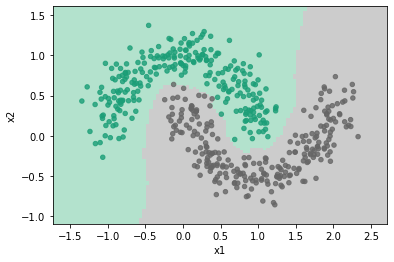

In [6]:
def plot_knn(model, X, y, resolution=100, ax=None):
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd

    x1 = X.iloc[:,0]
    x2 = X.iloc[:,1]
    x1_range = np.linspace(x1.min()*1.1 - x1.max()*0.1, x1.max()*1.1 - x1.min()*0.1, resolution)
    x2_range = np.linspace(x2.min()*1.1 - x2.max()*0.1, x2.max()*1.1 - x2.min()*0.1, resolution)
    grid_x1_values, grid_x2_values = np.meshgrid(x1_range, x2_range)
    x_prime = np.column_stack((grid_x1_values.ravel(), grid_x2_values.ravel()))
    x_prime = pd.DataFrame(x_prime, columns=X.columns)
    y_hat = model.predict(x_prime).reshape(grid_x1_values.shape)

    if ax is None:
        fig, ax = plt.subplots()
    ax.pcolormesh(grid_x1_values, grid_x2_values, y_hat, cmap="Pastel2", alpha=1.0, shading="auto")
    X.plot.scatter(0, 1, c=y, colormap="Dark2", colorbar=False, alpha=0.8, ax=ax)

plot_knn(model, X, y)

## Project

In [9]:
import matplotlib.pyplot as plt
from pandas import DataFrame
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

noises = [0.15, 0.3]
neighbours = [1, 5, 10, 100, 200]

In [10]:
def plot_knn(model, X, y, resolution=100, ax=None):
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd

    x1 = X.iloc[:,0]
    x2 = X.iloc[:,1]
    x1_range = np.linspace(x1.min()*1.1 - x1.max()*0.1, x1.max()*1.1 - x1.min()*0.1, resolution)
    x2_range = np.linspace(x2.min()*1.1 - x2.max()*0.1, x2.max()*1.1 - x2.min()*0.1, resolution)
    grid_x1_values, grid_x2_values = np.meshgrid(x1_range, x2_range)
    x_prime = np.column_stack((grid_x1_values.ravel(), grid_x2_values.ravel()))
    x_prime = pd.DataFrame(x_prime, columns=X.columns)
    y_hat = model.predict(x_prime).reshape(grid_x1_values.shape)

    if ax is None:
        fig, ax = plt.subplots()
    ax.pcolormesh(grid_x1_values, grid_x2_values, y_hat, cmap="Pastel2", alpha=1.0, shading="auto")
    X.plot.scatter(0, 1, c=y, colormap="Dark2", colorbar=False, alpha=0.8, ax=ax)

- noise when calling make_moons (between 0.1 and 0.3 is probably a good range),
- n_neighbors when creating the model (between 1 and 200).

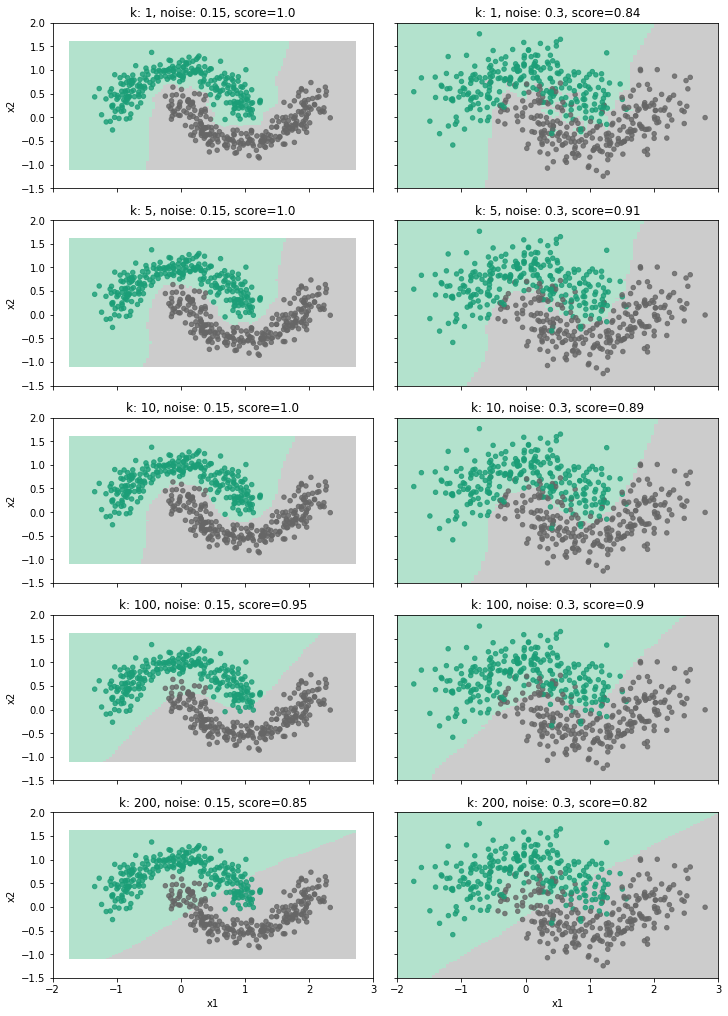

In [11]:
# We'll plot the results in a grid of subplots
fig, axs = plt.subplots(
    nrows=len(neighbours),
    ncols=len(noises),
    figsize=(10, 14),
    constrained_layout=True,
    sharex=True,
    sharey=True
)

for col, noise in enumerate(noises):
    for row, n_neighbors in enumerate(neighbours):
        # Make the dummy data (uses the `noise` variable)
        X, y = make_moons(n_samples=500, noise=noise, random_state=42)
        X = DataFrame(X, columns=["x1", "x2"])
        train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)
        
        # Fit and score the model (uses the `n_neighbors` variable)
        model = KNeighborsClassifier(n_neighbors=n_neighbors).fit(train_X, train_y)
        score = model.score(test_X, test_y)

        # Plot the results in the grid of subplots
        ax = axs[row, col]
        ax.set_xlim(-2, 3)
        ax.set_ylim(-1.5, 2)
        ax.set_title(f"k: {n_neighbors}, noise: {noise}, score={score:.2}")
        plot_knn(model, X, y, ax=ax)